In [3]:
import nltk
from nltk import bigrams, FreqDist
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt

import pickle
from collections import defaultdict


In [4]:
 nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\1mscds46\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


True

In [5]:
#Reading Text File 'austen-emma.txt'
emma_text = gutenberg.words('austen-emma.txt')
print(len(emma_text))

192427


In [7]:
#Building Objects
#1. Word tokens in lowercase
a_toks = [word.lower() for word in emma_text]
#print(" Word tokens in lowercase:",a_toks)


In [17]:
#Word Frequency Distribution
a_tokfd = FreqDist(a_toks)
print("Word Frequency Distribution:",a_tokfd)




Word Frequency Distribution: <FreqDist with 7344 samples and 192427 outcomes>


In [10]:
#Word Bigrams as a List
a_bigrams = list(bigrams(a_toks))
a_bigrams



[('[', 'emma'),
 ('emma', 'by'),
 ('by', 'jane'),
 ('jane', 'austen'),
 ('austen', '1816'),
 ('1816', ']'),
 (']', 'volume'),
 ('volume', 'i'),
 ('i', 'chapter'),
 ('chapter', 'i'),
 ('i', 'emma'),
 ('emma', 'woodhouse'),
 ('woodhouse', ','),
 (',', 'handsome'),
 ('handsome', ','),
 (',', 'clever'),
 ('clever', ','),
 (',', 'and'),
 ('and', 'rich'),
 ('rich', ','),
 (',', 'with'),
 ('with', 'a'),
 ('a', 'comfortable'),
 ('comfortable', 'home'),
 ('home', 'and'),
 ('and', 'happy'),
 ('happy', 'disposition'),
 ('disposition', ','),
 (',', 'seemed'),
 ('seemed', 'to'),
 ('to', 'unite'),
 ('unite', 'some'),
 ('some', 'of'),
 ('of', 'the'),
 ('the', 'best'),
 ('best', 'blessings'),
 ('blessings', 'of'),
 ('of', 'existence'),
 ('existence', ';'),
 (';', 'and'),
 ('and', 'had'),
 ('had', 'lived'),
 ('lived', 'nearly'),
 ('nearly', 'twenty'),
 ('twenty', '-'),
 ('-', 'one'),
 ('one', 'years'),
 ('years', 'in'),
 ('in', 'the'),
 ('the', 'world'),
 ('world', 'with'),
 ('with', 'very'),
 ('very',

In [20]:
# Bigram Frequency Distribution
a_bigramfd = FreqDist(a_bigrams)
print(" Bigram Frequency Distribution:",a_bigramfd)


 Bigram Frequency Distribution: <FreqDist with 64601 samples and 192426 outcomes>


In [21]:
#Bigram (w1, w2) Conditional Frequency Distribution
a_bigramcfd = nltk.ConditionalFreqDist(a_bigrams)
print("Bigram (w1, w2) Conditional Frequency Distribution:",a_bigramcfd)

Bigram (w1, w2) Conditional Frequency Distribution: <ConditionalFreqDist with 7343 conditions>


In [24]:
#Pickling Bigram CFD
with open('austen_emma_bigramcfd.pkl', 'wb') as f:
    pickle.dump(a_bigramcfd, f, pickle.HIGHEST_PROTOCOL)


In [25]:
# Word tokens and types:
num_tokens = len(a_toks)
num_types = len(set(a_toks))
print(f"Number of word tokens in 'austen-emma.txt': {num_tokens}")
print(f"Number of word types in 'austen-emma.txt': {num_types}")


Number of word tokens in 'austen-emma.txt': 192427
Number of word types in 'austen-emma.txt': 7344


Top 20 most frequent words and their counts in 'austen-emma.txt':
[(',', 11454), ('.', 6928), ('to', 5239), ('the', 5201), ('and', 4896), ('of', 4291), ('i', 3178), ('a', 3129), ('it', 2528), ('her', 2469), ('was', 2398), ('she', 2340), (';', 2199), ('in', 2188), ('not', 2140), ('"', 2004), ('you', 1980), ('be', 1975), ('that', 1806), ('he', 1806)]


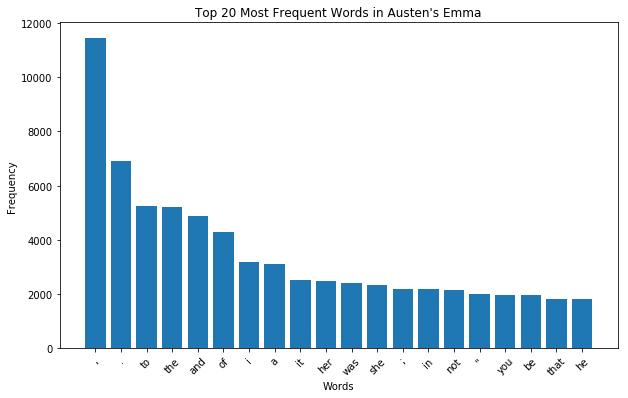

In [26]:
#Top 20 most frequent words:
top_20_words = a_tokfd.most_common(20)
print("Top 20 most frequent words and their counts in 'austen-emma.txt':")
print(top_20_words)

# Plotting the top 20 words
words, frequencies = zip(*top_20_words)
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in Austen\'s Emma')
plt.show()


In [28]:
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1mscds46\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
# Top 20 most frequent word bigrams, omitting stop words

from nltk.corpus import stopwords

# Filter out stopwords from bigrams
stop_words = set(stopwords.words('english'))
filtered_bigrams = [bigram for bigram in a_bigrams if not any(word in stop_words for word in bigram)]

# Calculate frequency distribution for filtered bigrams
filtered_bigramfd = FreqDist(filtered_bigrams)
top_20_filtered_bigrams = filtered_bigramfd.most_common(20)
print("Top 20 most frequent word bigrams (without stopwords) and their counts:")
print(top_20_filtered_bigrams)


Top 20 most frequent word bigrams (without stopwords) and their counts:
[(('mr', '.'), 1153), (('."', '"'), 757), (('mrs', '.'), 699), (('.', 'weston'), 427), (('.', '"'), 415), ((',', '"'), 398), (('.', 'elton'), 381), (('.', 'knightley'), 305), ((',"', 'said'), 225), (('miss', 'woodhouse'), 173), (('emma', ','), 173), (('oh', '!'), 153), (('frank', 'churchill'), 151), (('?"', '"'), 147), (('.', 'woodhouse'), 135), (('.', 'mr'), 128), (('every', 'thing'), 126), (('miss', 'fairfax'), 125), (('miss', 'bates'), 113), (('jane', 'fairfax'), 111)]


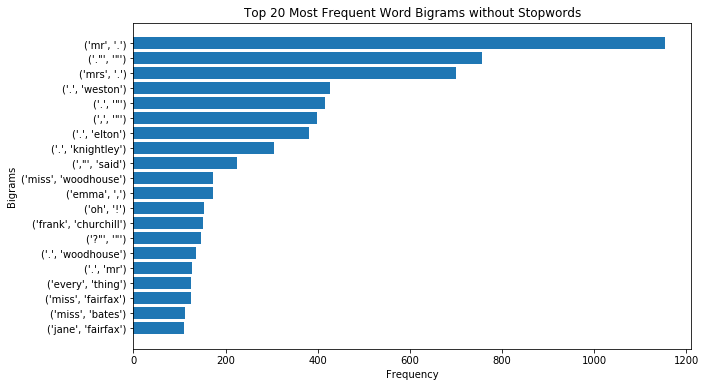

In [41]:
# Plotting the top 20 filtered bigrams
# Extracting bigram labels and frequencies
bigram_labels, bigram_frequencies = zip(*top_20_filtered_bigrams)

plt.figure(figsize=(10, 6))
plt.barh(range(len(bigram_labels)), bigram_frequencies, align='center')
plt.yticks(range(len(bigram_labels)), bigram_labels)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Most Frequent Word Bigrams without Stopwords')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent at the top
plt.show()


In [36]:
#Count occurrences of 'so' and their relative frequency
so_count = a_tokfd['so']
relative_frequency_so = so_count / num_tokens
print(f"The word 'so' occurs {so_count} times in 'austen-emma.txt'")
print(f"Relative frequency of 'so' in the corpus: {relative_frequency_so:.4f}")


The word 'so' occurs 974 times in 'austen-emma.txt'
Relative frequency of 'so' in the corpus: 0.0051


In [37]:
#Top 20 'so-initial' bigrams and their counts
so_initial_bigrams = [bigram for bigram in a_bigrams if bigram[0] == 'so']
so_initial_bigramfd = FreqDist(so_initial_bigrams)
top_20_so_initial_bigrams = so_initial_bigramfd.most_common(20)
print("Top 20 'so-initial' bigrams and their counts:")
print(top_20_so_initial_bigrams)


Top 20 'so-initial' bigrams and their counts:
[(('so', 'much'), 99), (('so', 'very'), 86), (('so', 'well'), 31), (('so', ','), 31), (('so', 'many'), 29), (('so', 'long'), 27), (('so', 'little'), 20), (('so', 'far'), 19), (('so', 'i'), 18), (('so', '.'), 18), (('so', 'kind'), 14), (('so', ';'), 13), (('so', 'good'), 13), (('so', 'often'), 10), (('so', 'soon'), 9), (('so', 'great'), 8), (('so', 'it'), 8), (('so', 'you'), 8), (('so', 'she'), 8), (('so', 'fond'), 7)]


In [38]:
#Probability of 'so' followed by 'much'
so_much_count =a_bigramcfd['so']['much']
probability_so_much = so_much_count / a_tokfd['so']
print(f"Probability of 'so' followed by 'much': {probability_so_much:.4f}")


Probability of 'so' followed by 'much': 0.1016


In [39]:
#Probability of 'so' followed by 'will'
so_will_count = a_bigramcfd['so']['will']
probability_so_will = so_will_count / a_tokfd['so']
print(f"Probability of 'so' followed by 'will': {probability_so_will:.4f}")


Probability of 'so' followed by 'will': 0.0010
